<h1><b>Home task : KNN classification</b></h1>

<b><h2>Iris dataset</h2></b>

In [213]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

<h4>load iris dataset</h4>

In [214]:
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


<h4>split to train and test</h4>

In [215]:
train_df, test_df = train_test_split(df_iris)
print ('len(train_df)={:,}'.format(len(train_df)))
print ('len(test_df)={:,}'.format(len(test_df)))

len(train_df)=112
len(test_df)=38


In [216]:
X_train = train_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y_train = train_df['label']
X_test = test_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y_test = test_df['label']


print ('X_train.shape=', X_train.shape)
print ('y_train.shape=', y_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_test.shape=', y_test.shape)
print ('X_train[0]=')
X_train.iloc[0]

X_train.shape= (112, 4)
y_train.shape= (112,)
X_test.shape= (38, 4)
y_test.shape= (38,)
X_train[0]=


sepal length (cm)    5.0
sepal width (cm)     3.5
petal length (cm)    1.6
petal width (cm)     0.6
Name: 43, dtype: float64

In [217]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

<h4>train KNN classifiers for different K</h4>

In [218]:
from sklearn.neighbors import KNeighborsClassifier
k=range(3, 18, 2)
best_k=0
best_test=0
for n_neighbors in k:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)
    print(n_neighbors)
    print ('score train = {:.3f}'.format(knn.score(X_train_scaled,y_train)))
    print ('score test = {:.3f}'.format(knn.score(X_test_scaled,y_test)))
    print('\n')
    if knn.score(X_test_scaled,y_test)>best_test:
        best_test=knn.score(X_test_scaled,y_test)
        best_k=n_neighbors

3
score train = 0.946
score test = 0.947


5
score train = 0.946
score test = 0.974


7
score train = 0.955
score test = 0.921


9
score train = 0.955
score test = 0.947


11
score train = 0.955
score test = 0.868


13
score train = 0.964
score test = 0.842


15
score train = 0.955
score test = 0.842


17
score train = 0.964
score test = 0.868




<h4>choose the best K determined on test set</h4>

In [219]:
k_best = best_k
score_best = best_test
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 5 , score = 0.9736842105263158


<b><h2>Synthetic dataset</h2></b>

<h4>generrate synthetic dataset</h4>

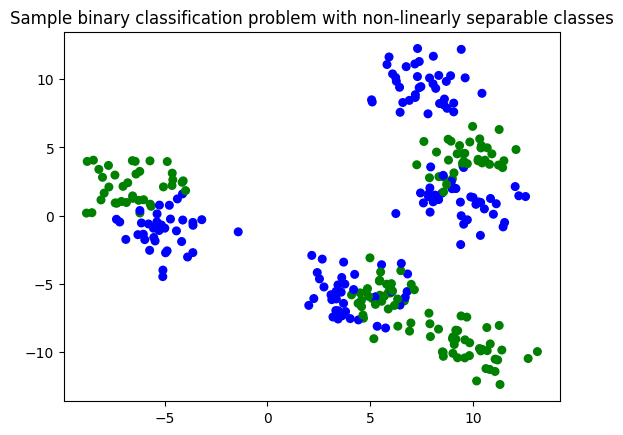

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
import numpy as np 
from sklearn.model_selection import train_test_split
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8, cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker= 'o', s=30, cmap=cmap_bold)


<h4>split to train and test</h4>

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h4>train KNN regressors for different K</h4>

In [5]:
k=range(2, 20)
best_test=0
best_k=0
for n_neighbors in k:
    knnreg = KNeighborsRegressor(n_neighbors = n_neighbors)
    knnreg.fit(X_train_scaled, y_train)
    print(n_neighbors)
    train_score = knnreg.score(X_train_scaled, y_train)
    print(train_score)
    test_score = knnreg.score(X_test_scaled, y_test)
    print(test_score)
    print('\n')
    if test_score>best_test:
        best_test=test_score
        best_k=n_neighbors



2
0.8533072546230441
0.732905982905983


3
0.814287972182709
0.7032288698955365


4
0.815522759601707
0.7061965811965811


5
0.7887624466571835
0.7307692307692307


6
0.7881104788999527
0.7581315289648622


7
0.761953145411792
0.7503488574917145


8
0.7563455725462305
0.7512686965811965


9
0.7648964754227913
0.7368629313073757


10
0.7564011379800853
0.7553418803418803


11
0.7443071605751033
0.7426184926184927


12
0.7418059506875296
0.7366156220322887


13
0.7325494289057042
0.7483942750214939


14
0.7260283914419253
0.7487135879993023


15
0.7143195827406353
0.7485754985754985


16
0.71008734886202
0.7556507077991452


17
0.7081834156137562
0.7512051577795522


18
0.6998643380222328
0.74741479371109


19
0.6942762123546495
0.7212159954542227




<h4>choose the best K determined on test set</h4>

In [6]:
k_best = best_k
score_best = best_test
print ('The best k = {} , score = {}'.format(k_best,score_best))

The best k = 6 , score = 0.7581315289648622


<h4>visualize the decision boundary</h4>

Call prediction for all grid values (precision of drawing = 0.01, you may configure to speed up e.g. precision=0.05)


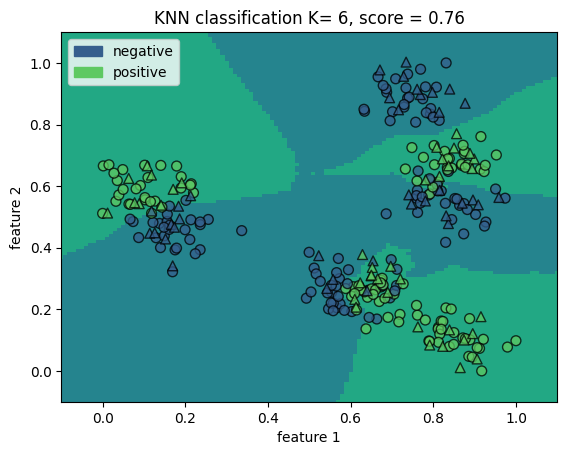

In [9]:
import ML_mst as mst
clf = KNeighborsRegressor(n_neighbors = k_best)
clf.fit(X_train_scaled, y_train)
score = clf.score (X_test_scaled, y_test)
mst.plot_decision_boundary(clf, X_train_scaled, y_train, X_test=X_test_scaled, y_test= y_test,
                               title='KNN classification K= {}, score = {:.2f}'.format(k_best, score), 
                               precision=0.01,plot_symbol_size = 50)